# LMAPR1492 : Tâche 8

In [100]:
# Garção Antonio
# 33672100
import numpy as np
from mp_api.client import MPRester
from pymatgen.core.operations import SymmOp
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.electronic_structure.plotter import BSPlotter
from pymatgen.phonon.plotter import PhononBSPlotter
from jupyter_jsmol.pymatgen import quick_view
from matplotlib import pyplot as plt
from lmapr1492 import plot_brillouin_zone, get_plot_bs, get_plot_dos, get_plot_bs_and_dos, get_branch_wavevectors
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [101]:
mp_key = "zWerxXVKJ4OBcYhUP0oO4SXcDOfS6EVF"
mp_id = "mp-1960"

In [102]:
with MPRester(mp_key) as m:
    prim_struc = m.get_structure_by_material_id(mp_id)
    el_bs = m.get_bandstructure_by_material_id(mp_id)
    el_dos = m.get_dos_by_material_id(mp_id)
    ph_bs = m.get_phonon_bandstructure_by_material_id(mp_id)
    ph_dos = m.get_phonon_dos_by_material_id(mp_id)
conv_struc = SpacegroupAnalyzer(prim_struc).get_conventional_standard_structure()
symmops = SpacegroupAnalyzer(conv_struc).get_space_group_operations()
print("Le recueil d'informations a bien été réalisé")

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving ElectronicStructureDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving ElectronicStructureDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving PhononBSDOSDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving PhononBSDOSDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Le recueil d'informations a bien été réalisé


## 1) Structure de la bande de phonons 

### Je vais commencer par afficher la zone de Brillouin, la structure de bande de phonons et recuellir les informations utiles

ZONE DE BRILLOUIN :


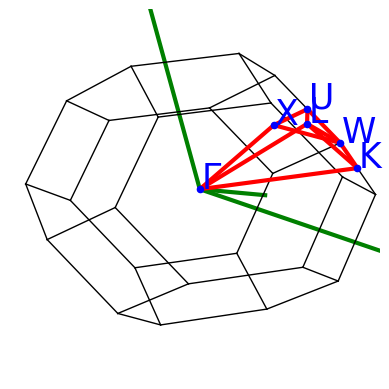

STRUCTURE DE BANDE DE PHONONS :


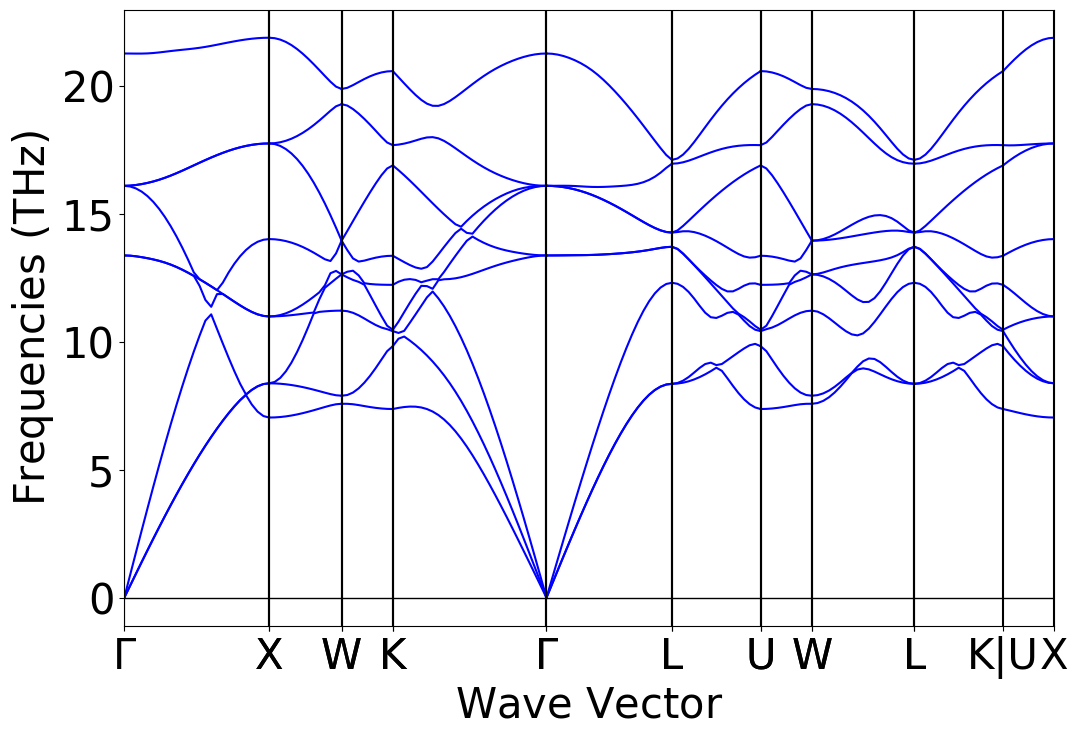

In [103]:
# J'affiche la zone de Brillouin
print("ZONE DE BRILLOUIN :")
Brillouin_zone = PhononBSPlotter(ph_bs)
Brillouin_plot = Brillouin_zone.plot_brillouin()
# Je choisis les vecteurs et l'affichage 
print("STRUCTURE DE BANDE DE PHONONS :")
ph_struct_plot = PhononBSPlotter(ph_bs)
ph_struct_plot.get_plot()
ph_data = plot.bs_plot_data()
# Je choisis les vecteurs et les bandes
ph_vect = data.get("distances")
ph_freq = data.get("frequency")

vect1 = ph_vect[0]
vect2 = ph_vect[5]
vect3 = ph_vect[6]
ph_freq1 = ph_freq[0][0]
ph_freq2 = ph_freq[5][1]
ph_freq3 = ph_freq[6][2]

### Je calcule les vitesses 

Pour calculer les vitesses, j'utilise que vs = df/dq, avec f, la fréquence et q, le vecteur d'onde et vs, la vitesse du son. Pour ce qui est du choix des branches, il a été fait en veillant à avoir des directions différentes.

In [104]:

# Je calcule les vitesses
Tx1 = np.polyfit((vect1[0], vect1[1], vect1[2]), (ph_freq1[0], ph_freq1[1], ph_freq1[2]), 1)
Tx2 = np.polyfit((vect2[-2], vect2[-1]), (ph_freq2[-2], ph_freq2[-1]), 1)
Tx3 = np.polyfit((vect3[0], vect3[1], vect3[2]), (ph_freq3[0], ph_freq3[1], ph_freq3[2]), 1)
coeff = 2 * np.pi * 1e12 * 1e-10
c_1 = np.abs(Tx1[0] * coeff)
c_2 = np.abs(Tx2[0] * coeff)
c_3 = np.abs(Tx3[0] * coeff)

# Branche 1
print(r"Direction : Γ-X, pour la première branche:")
print(f"VITESSE DU SON : {c_1} [m/s] \n")

# Branche 2
print(r"Direction : U-L, pour la seconde branche:")
print(f"VITESSE DU SON : {c_2} [m/s] \n")

# Branche 3
print(r"Direction : U-W, pour la troisième branche:")
print(f"VITESSE DU SON : {c_3} [m/s] \n")

Direction : Γ-X, pour la première branche:
VITESSE DU SON : 5327.981893627284 [m/s] 

Direction : U-L, pour la seconde branche:
VITESSE DU SON : 1079.0880439353623 [m/s] 

Direction : U-W, pour la troisième branche:
VITESSE DU SON : 815.3920141037119 [m/s] 



## Affichage des vecteurs

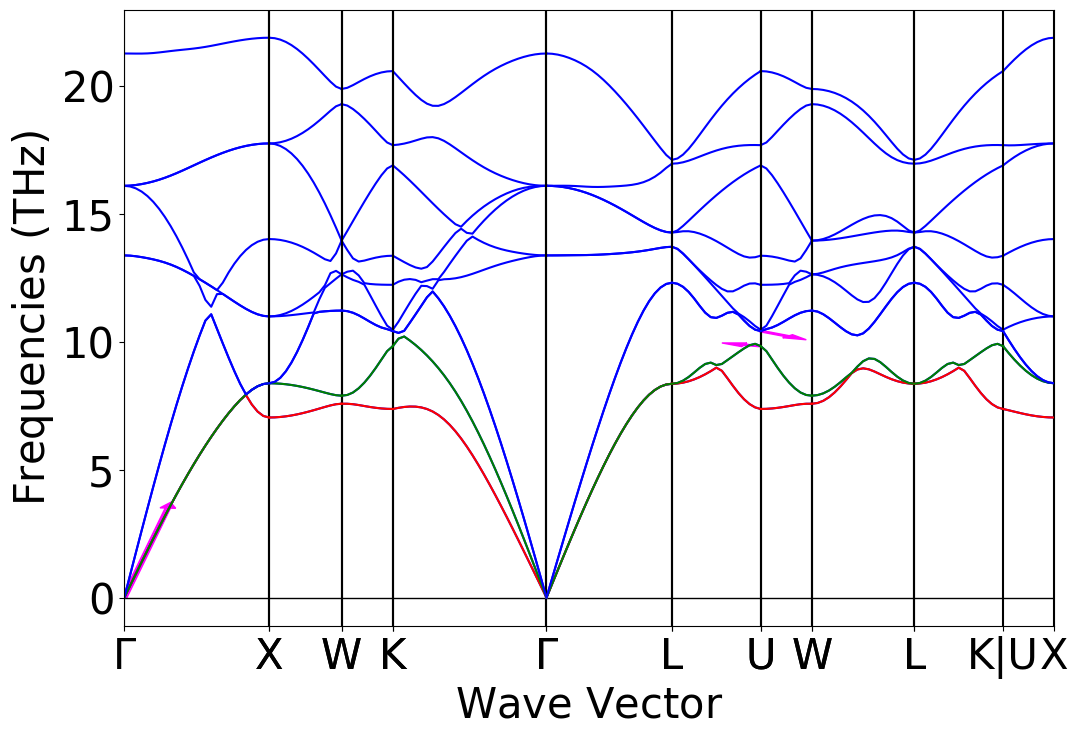

In [105]:

f1 = lambda x: x * pente1[0] + pente1[1]
f2 = lambda x: x * pente2[0] + pente2[1]
f3 = lambda x: x * pente3[0] + pente3[1]

# Je calcule les vecteurs et plot le graphe et les vecteurs
x1 = vect1[8] - vect1[0]
y1 = f1(vect1[8]) - f1(dist1[0])
x2 = vect2[-8] - vect2[-1]
y2 = f2(vect2[-8]) - f2(vect2[-1])
x3 = dist3[8] - dist3[0]
y3 = f3(dist3[8]) - f3(dist3[0])
plot.get_plot()
for i in range(len(ph_vect)):
    plt.plot(ph_vect[i],ph_freq[i][0],'red')
    plt.plot(ph_vect[i],ph_freq[i][1],'green')
    plt.plot(ph_vect[i],ph_freq[i][2],'blue')

plt.arrow(vect1[0], ph_freq1[0], x1, y1, color='magenta', width = 0.05, length_includes_head =True)
plt.arrow(vect2[-1], ph_freq2[-1], x2, y2, color='magenta', width = 0.05, length_includes_head =True)
plt.arrow(vect3[0], ph_freq3[0], x3, y3, color='magenta', width = 0.05, length_includes_head =True)